***
<a name='T'>
<p style="background-color:#09E5E8;
          font-family:computermodern;
          color:#000000;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Lung Cancer Prediction and Data Visualization</p>

<center>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2636109/4510352/0bb8bbdffbb0da5a3505ffdc96ab9b40/dataset-card.png?t=2022-11-14-20-30-40" width="300" height="150" align="center"/>

***

# <b><span style='color:#07CBCD'> | </span> Sections </b>

[`1. Data Meaning`](#DM)<br>
[`2. Initial Data Analysis`](#IIA)<br>
[`3. Data Visualization`](#DV)<br>
[`4. Model Building`](#MB)<br>
>[`4.1 Training Testing Split`](#TT)<br>
[`4.2 Multinomial Regression`](#MR)<br>
[`4.3 Random Forest`](#RF)<br>
[`4.4 Naive Bayes`](#NB)<br>
[`4.5 K-Nearest Neighbors`](#KNN)<br>
[`4.6 Support Vector Machine`](#SVM)<br>
    
[`5. Bottom`](#B)<br>
***

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
    
%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()

In [2]:
# Colors
colors = ['lightcoral',
          'brown',
          'lightseagreen',
          'maroon',
          'deeppink',
          'darkorange',
          'royalblue',
          'darkviolet',
          'gold',
          'crimson',
          'lightsteelblue',
          'salmon',
          'mediumseagreen',
          'olivedrab',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'violet',
          'cyan']

# <p style="font-size:0%;color:white;"><b> 1 - Data Meaning </b></p>

<a name='DM'>
    
<div style="color:white;display:width;border-radius:10px;
            background-color:#09E5E8;
            font-size:200%;
            font-family:computermodern;
            letter-spacing:0.75px">
    <p style="padding: 8px;color:black;"><b> 1 | Data Meaning </b></p>
</div>
 

- This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels, weight loss, shortness of breath, wheezing, swallowing difficulty, clubbing of finger nails, frequent colds, dry coughs, and snoring. 
    

|   Columns   |   Meaning   |
| ----------- | ----------- |
| Age           | The age of the patient. (Numeric)       |
| Gender        |  The gender of the patient. (Categorical)        |
| Air Pollution | The level of air pollution exposure of the patient. (Categorical)|
| Alcohol use   | The level of alcohol use of the patient. (Categorical)|
| Dust Allergy  |The level of dust allergy of the patient. (Categorical)|
| ccuPational Hazards  | The level of occupational hazards of the patient. (Categorical)|
| Genetic Risk         | The level of genetic risk of the patient. (Categorical)|
| chronic Lung Disease | The level of chronic lung disease of the patient. (Categorical)|
| Balanced Diet | The level of balanced diet of the patient. (Categorical)|
| Obesity       | The level of obesity of the patient. (Categorical)|
| Smoking       | The level of smoking of the patient. (Categorical)|
| Passive Smoker       | The level of passive smoker of the patient. (Categorical)|
| Chest Pain           | The level of chest pain of the patient. (Categorical)|
| Coughing of Blood    | The level of coughing of blood of the patient. (Categorical)|
| Fatigue       | The level of fatigue of the patient. (Categorical)|
| Weight Loss   | The level of weight loss of the patient. (Categorical)|
| Shortness of Breath  | The level of shortness of breath of the patient. (Categorical)|
| Wheezing      | The level of wheezing of the patient. (Categorical)|
| Swallowing Difficulty | The level of swallowing difficulty of the patient. (Categorical)|
| Clubbing of Finger Nails | The level of clubbing of finger nails of the patient. (Categorical)|


- The level of cancer severity column, is divided into three levels, `low`, `medium` and `high`. We'll analyze and develop a predictive method for the level of severity of the cancer. By analyzing this data we'll gain insight into what causes lung cancer and how best to prevent it.
    
# <p style="font-size:0%;color:white;"><b> 2 - Importing and Initial Analysis </b></p>
*** 
<a name='IIA'>
<div style="color:white;display:width;border-radius:10px;
            background-color:#09E5E8;
            font-size:200%;
            font-family:computermodern;
            letter-spacing:0.75px">
    <p style="padding: 8px;color:black;"><b> 2 | Importing and Initial Analysis </b></p>
</div>

In [3]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv", index_col='index')

# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
995     44       1              6            7             7   
996     37       2              6            8             7   
997     25       2              4            5             6   
998     18       2              6            8             7   
999     47       1              6            5             6   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   
...                     ...           ...                   ...   
995                       7             7                     6   
996                       7             7                     6   
997                       5             5                     4   
998                       7             7                     6   
999                       5             5                     4   

       balanced_diet  obesity  ...  fatigue  weight_loss  shortness_of_breath  \
index                          ...                                              
0                  2        4  ...        3            4                    2   
1                  2        2  ...        1            3                    7   
2                  6        7  ...        8            7                    9   
3                  7        7  ...        4            2                    3   
4                  7        7  ...        3            2                    4   
...              ...      ...  ...      ...          ...                  ...   
995                7        7  ...        5            3                    2   
996                7        7  ...        9            6                    5   
997                6        7  ...        8            7                    9   
998                7        7  ...        3            2                    4   
999                6        7  ...        8            7                    9   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   
...         ...                    ...                       ...   
995           7                      8                         2   
996           7                      2                         4   
997           2                      1                         4   
998           1                      4                         2   
999           2                      1                         4   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  
...   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

In [5]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [6]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

<a name='SD'>

## <b>2.1 <span style='color:#07CBCD'>|</span> Splitting Into y and X </b>

In [7]:
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss  \
index                          ...                                            
0                  2        4  ...                  4        3            4   
1                  2        2  ...                  3        1            3   
2                  6        7  ...                  8        8            7   
3                  7        7  ...                  8        4            2   
4                  7        7  ...                  9        3            2   

       shortness_of_breath  wheezing  swallowing_difficulty  \
index                                                         
0                        2         2                      3   
1                        7         8                      6   
2                        9         2                      1   
3                        3         1                      4   
4                        4         1                      4   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
index                                                               
0                             1              2          3        4  
1                             2              1          7        2  
2                             4              6          7        2  
3                             5              6          7        5  
4                             2              4          2        3  

[5 rows x 23 columns]

index
0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


# <p style="font-size:0%;color:white;"><b> 3 - Data Visualization </b></p>

***

<a name='DV'>

<div style="color:white;display:width;border-radius:10px;
            background-color:#09E5E8;
            font-size:200%;
            font-family:computermodern;
            letter-spacing:0.75px">
    <p style="padding: 8px;color:black;"><b> 3 | Data Visualization </b></p>
</div>

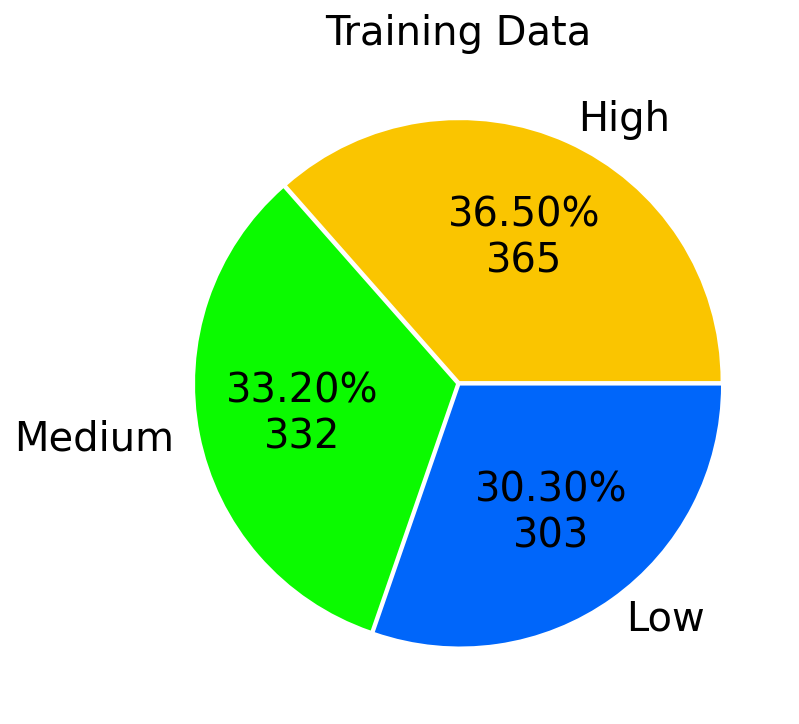

In [8]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

### Correlation Plot

A **correlation plot** is a quick and effective tool for identifying linear relationships between quantitative variables. It utilizes correlation coefficients, such as Pearson's, to quantify the strength and direction of these relationships.

**Strengths:**
1. **Linear Relationship Identification:** Quickly reveals linear associations between variables.
2. **Interpretation:** Correlation coefficients are easy to interpret.

**Limitations:**
1. **Linearity Assumption:** Limited to linear relationships; may miss non-linear associations.
2. **Outlier Sensitivity:** Prone to influence from outliers.
3. **Quantitative Variables Only:** Applicable mainly to quantitative data.

Despite these limitations, correlation plots serve as a valuable initial step in understanding relationships within a dataset, especially for their speed and simplicity.

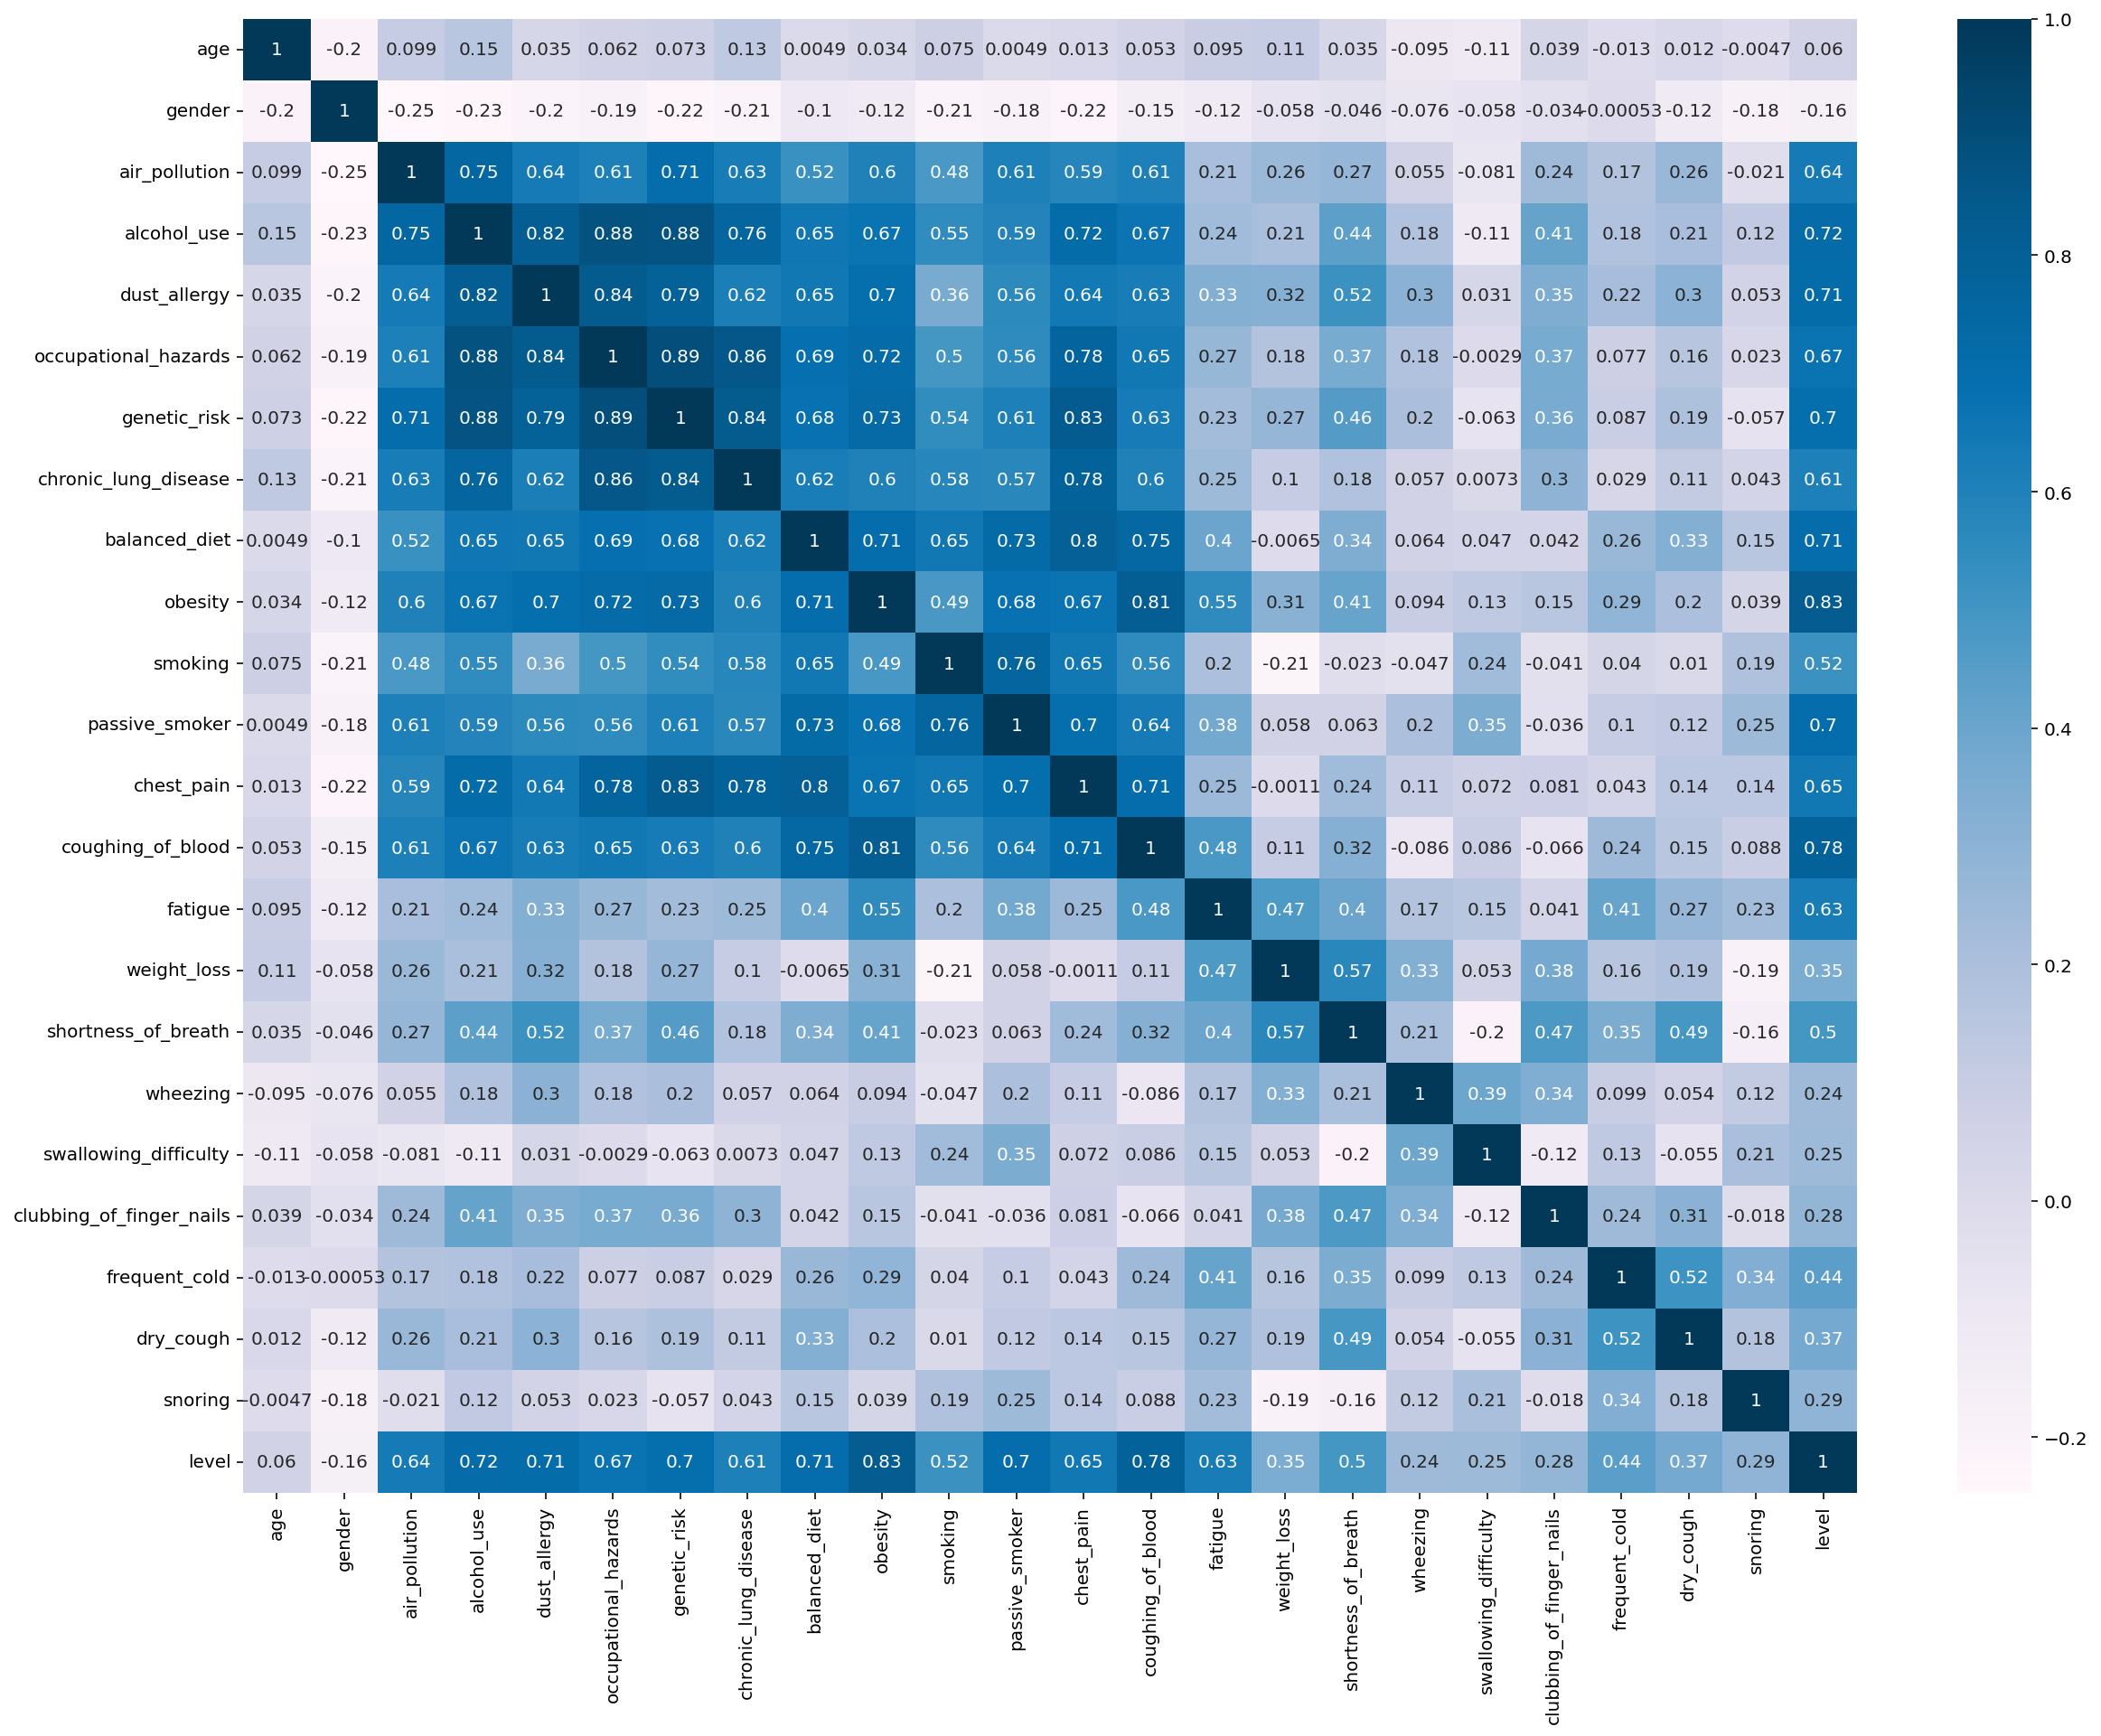

In [9]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

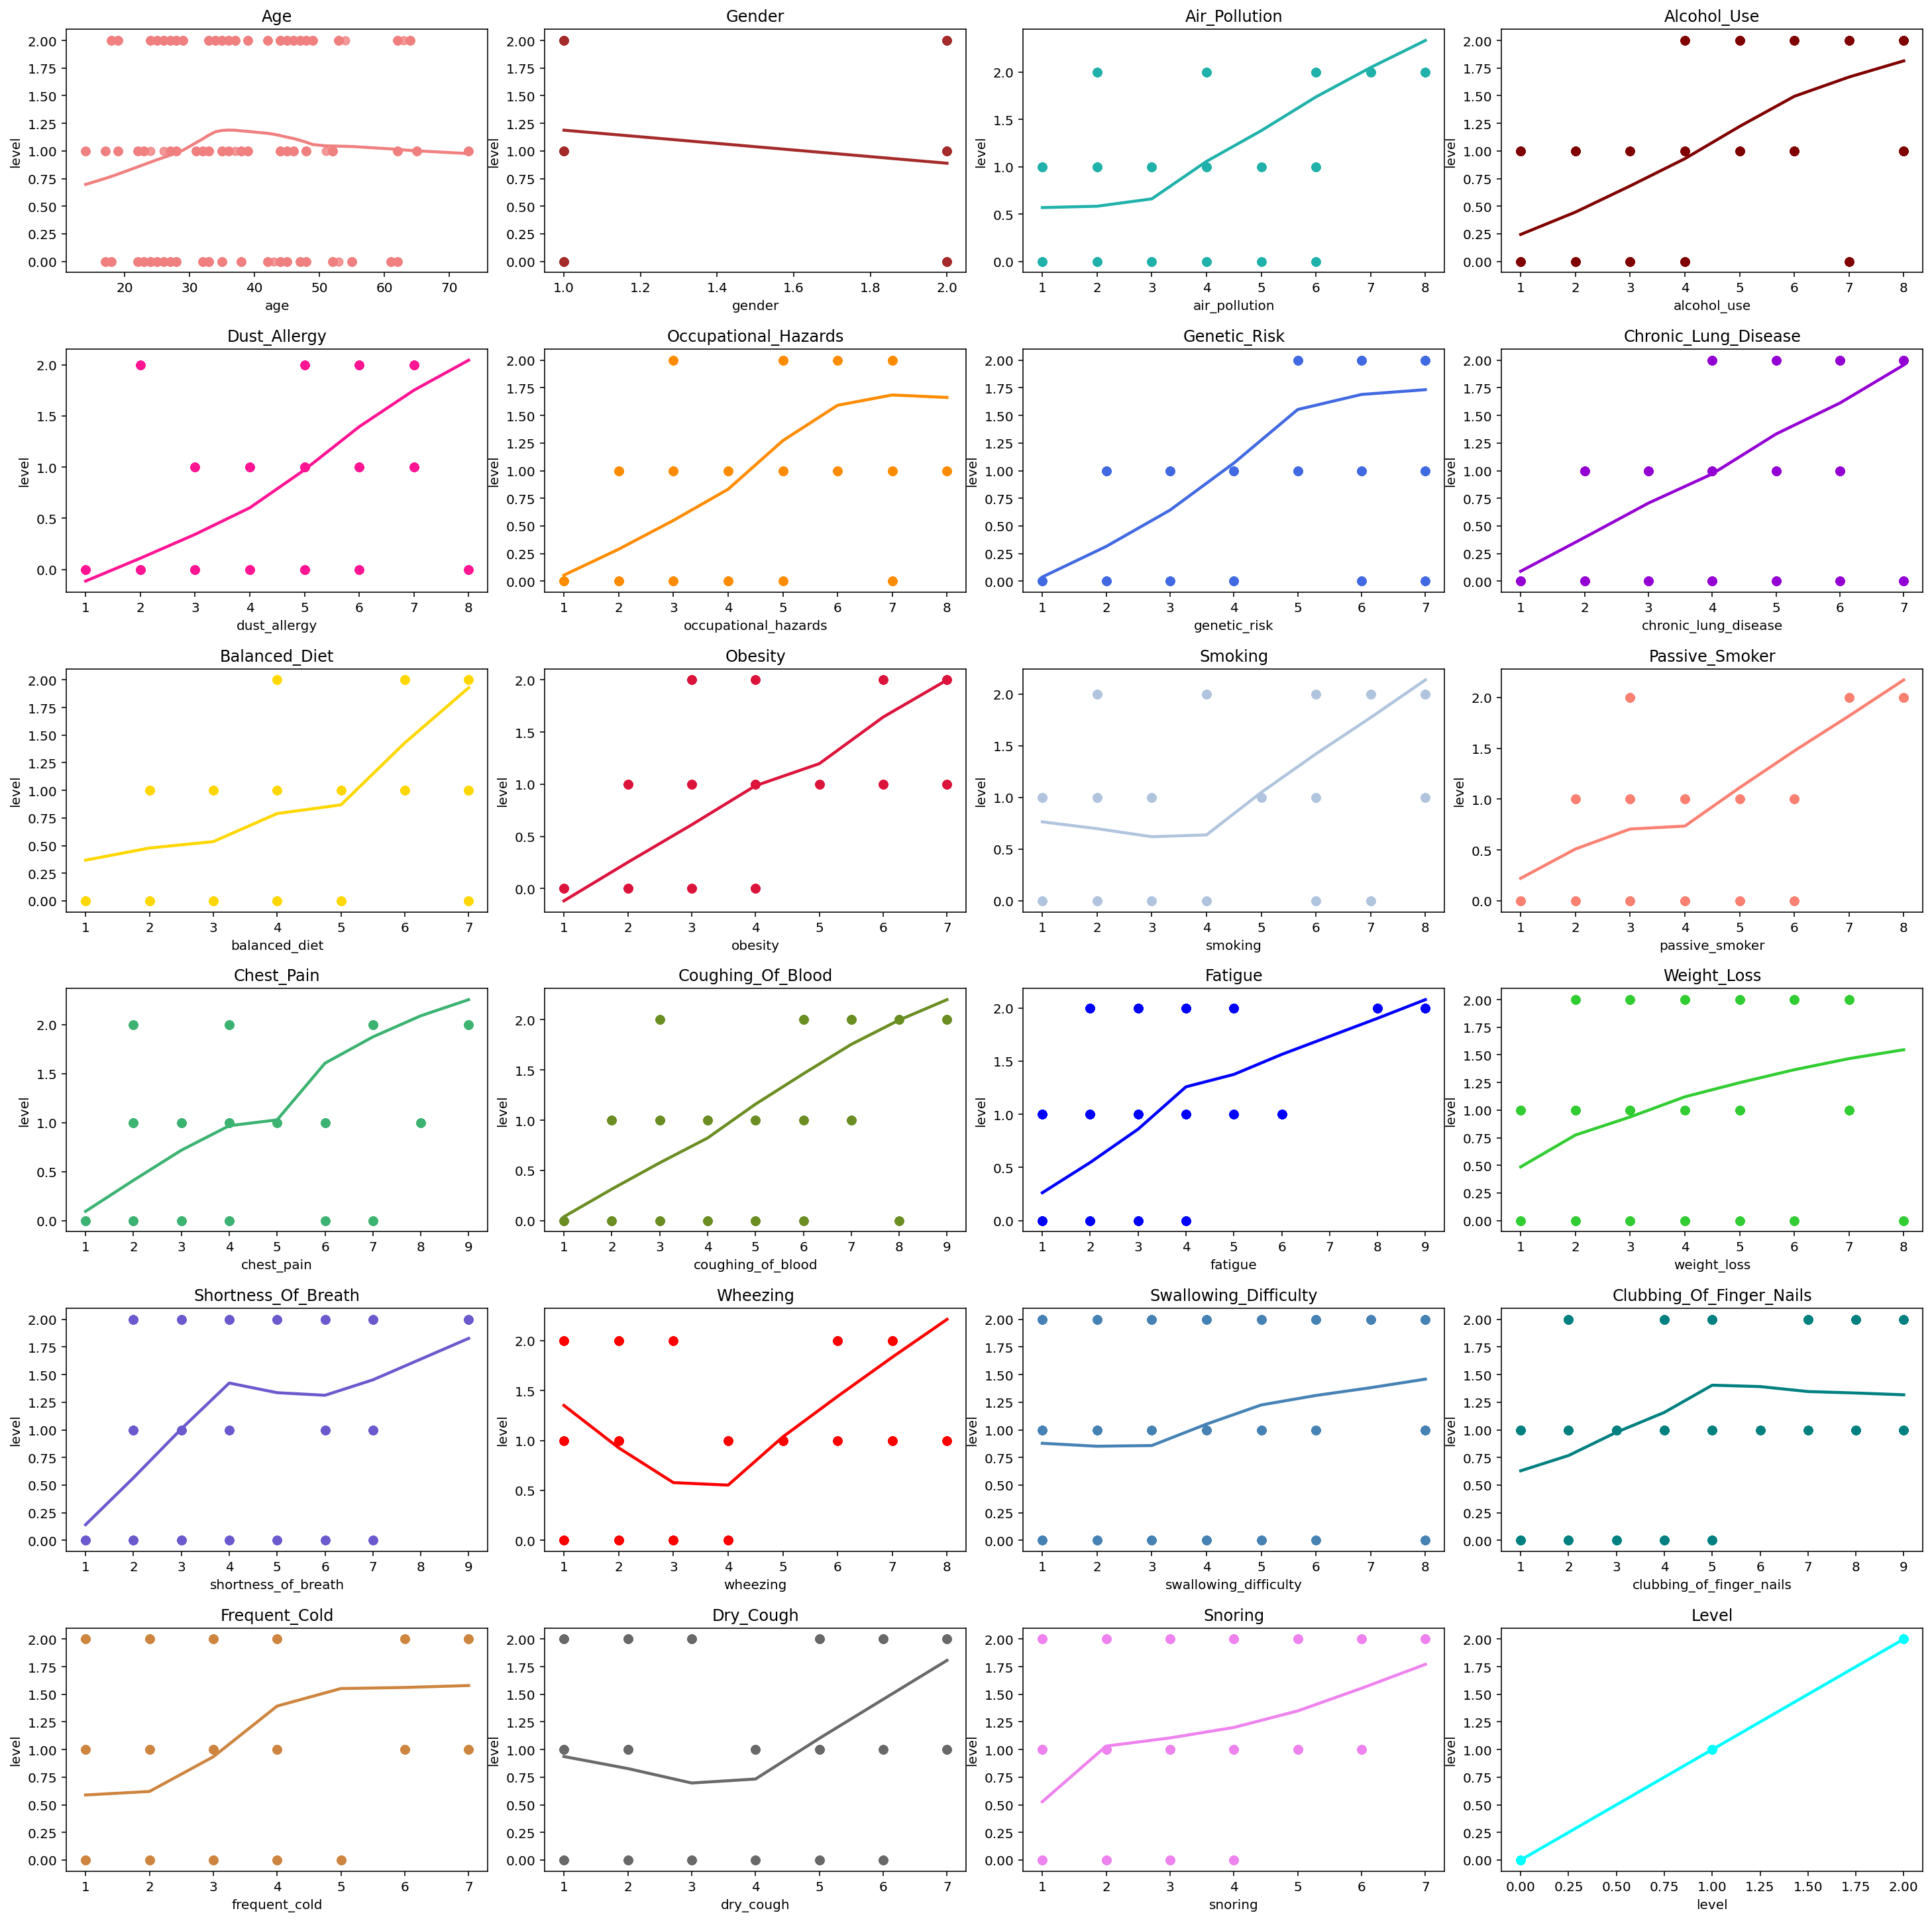

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, lowess=True, color=colors[i], ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

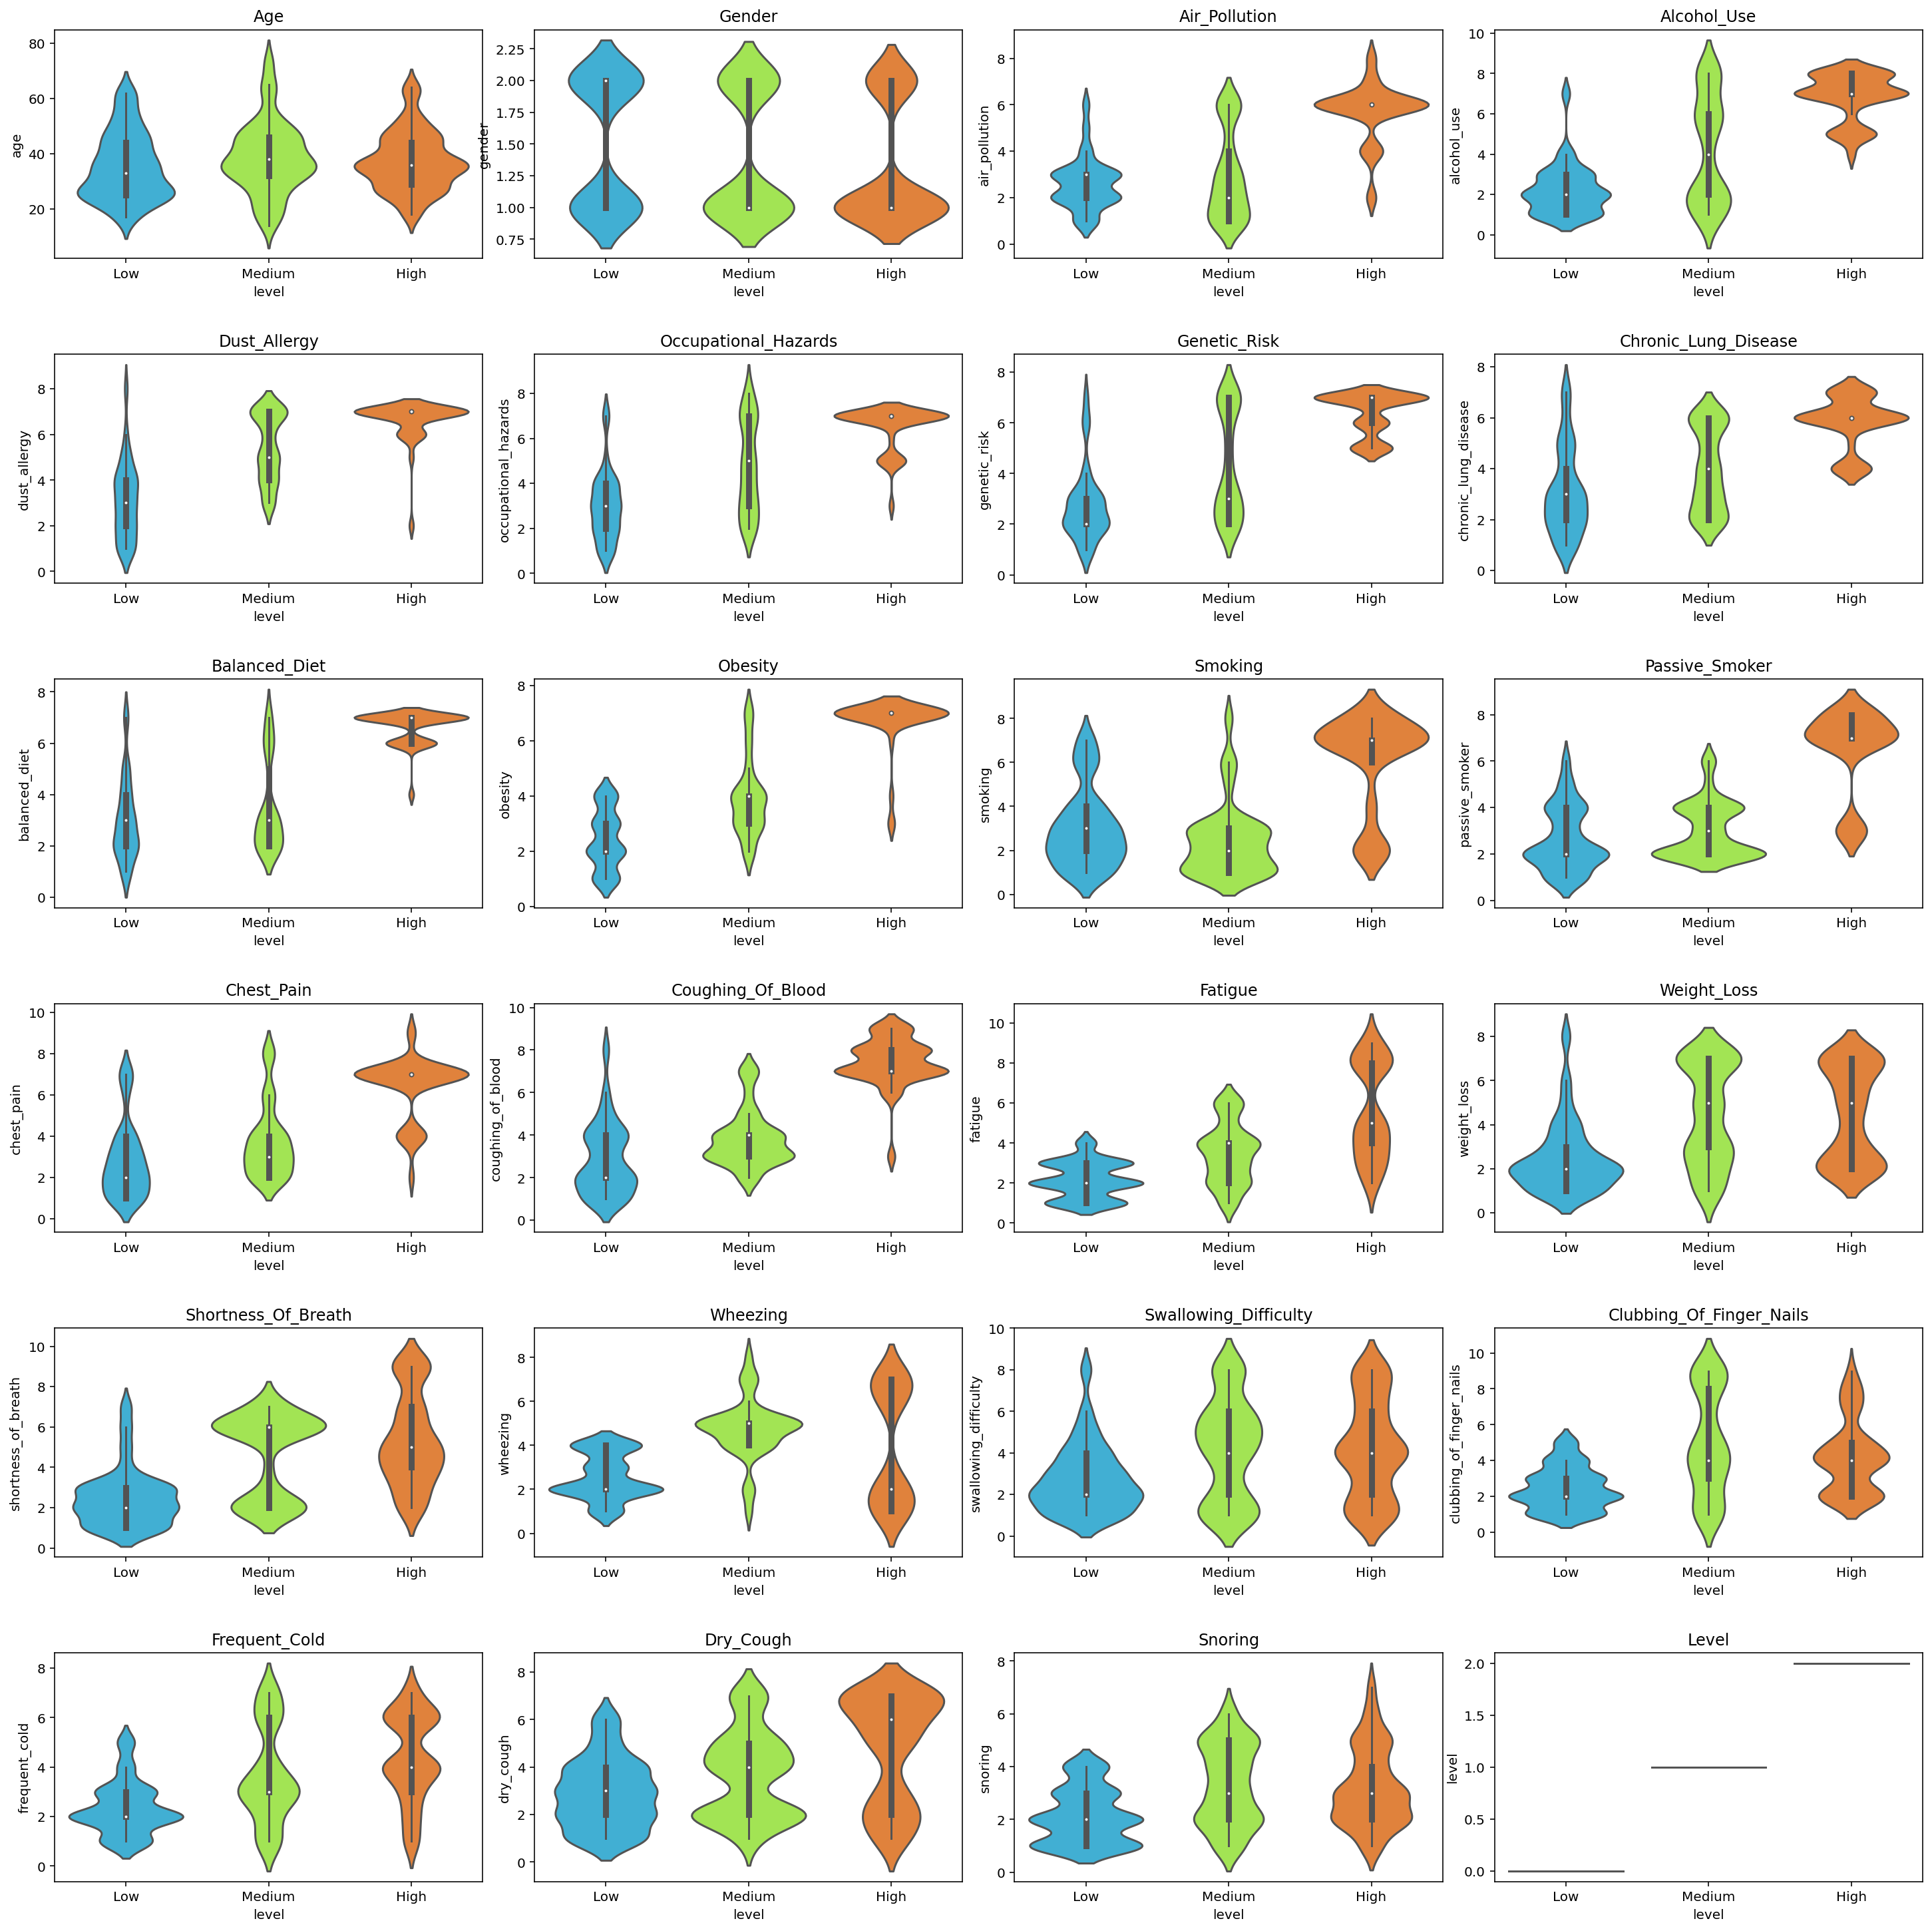

In [11]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=df, hue_order='level', palette='turbo', ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

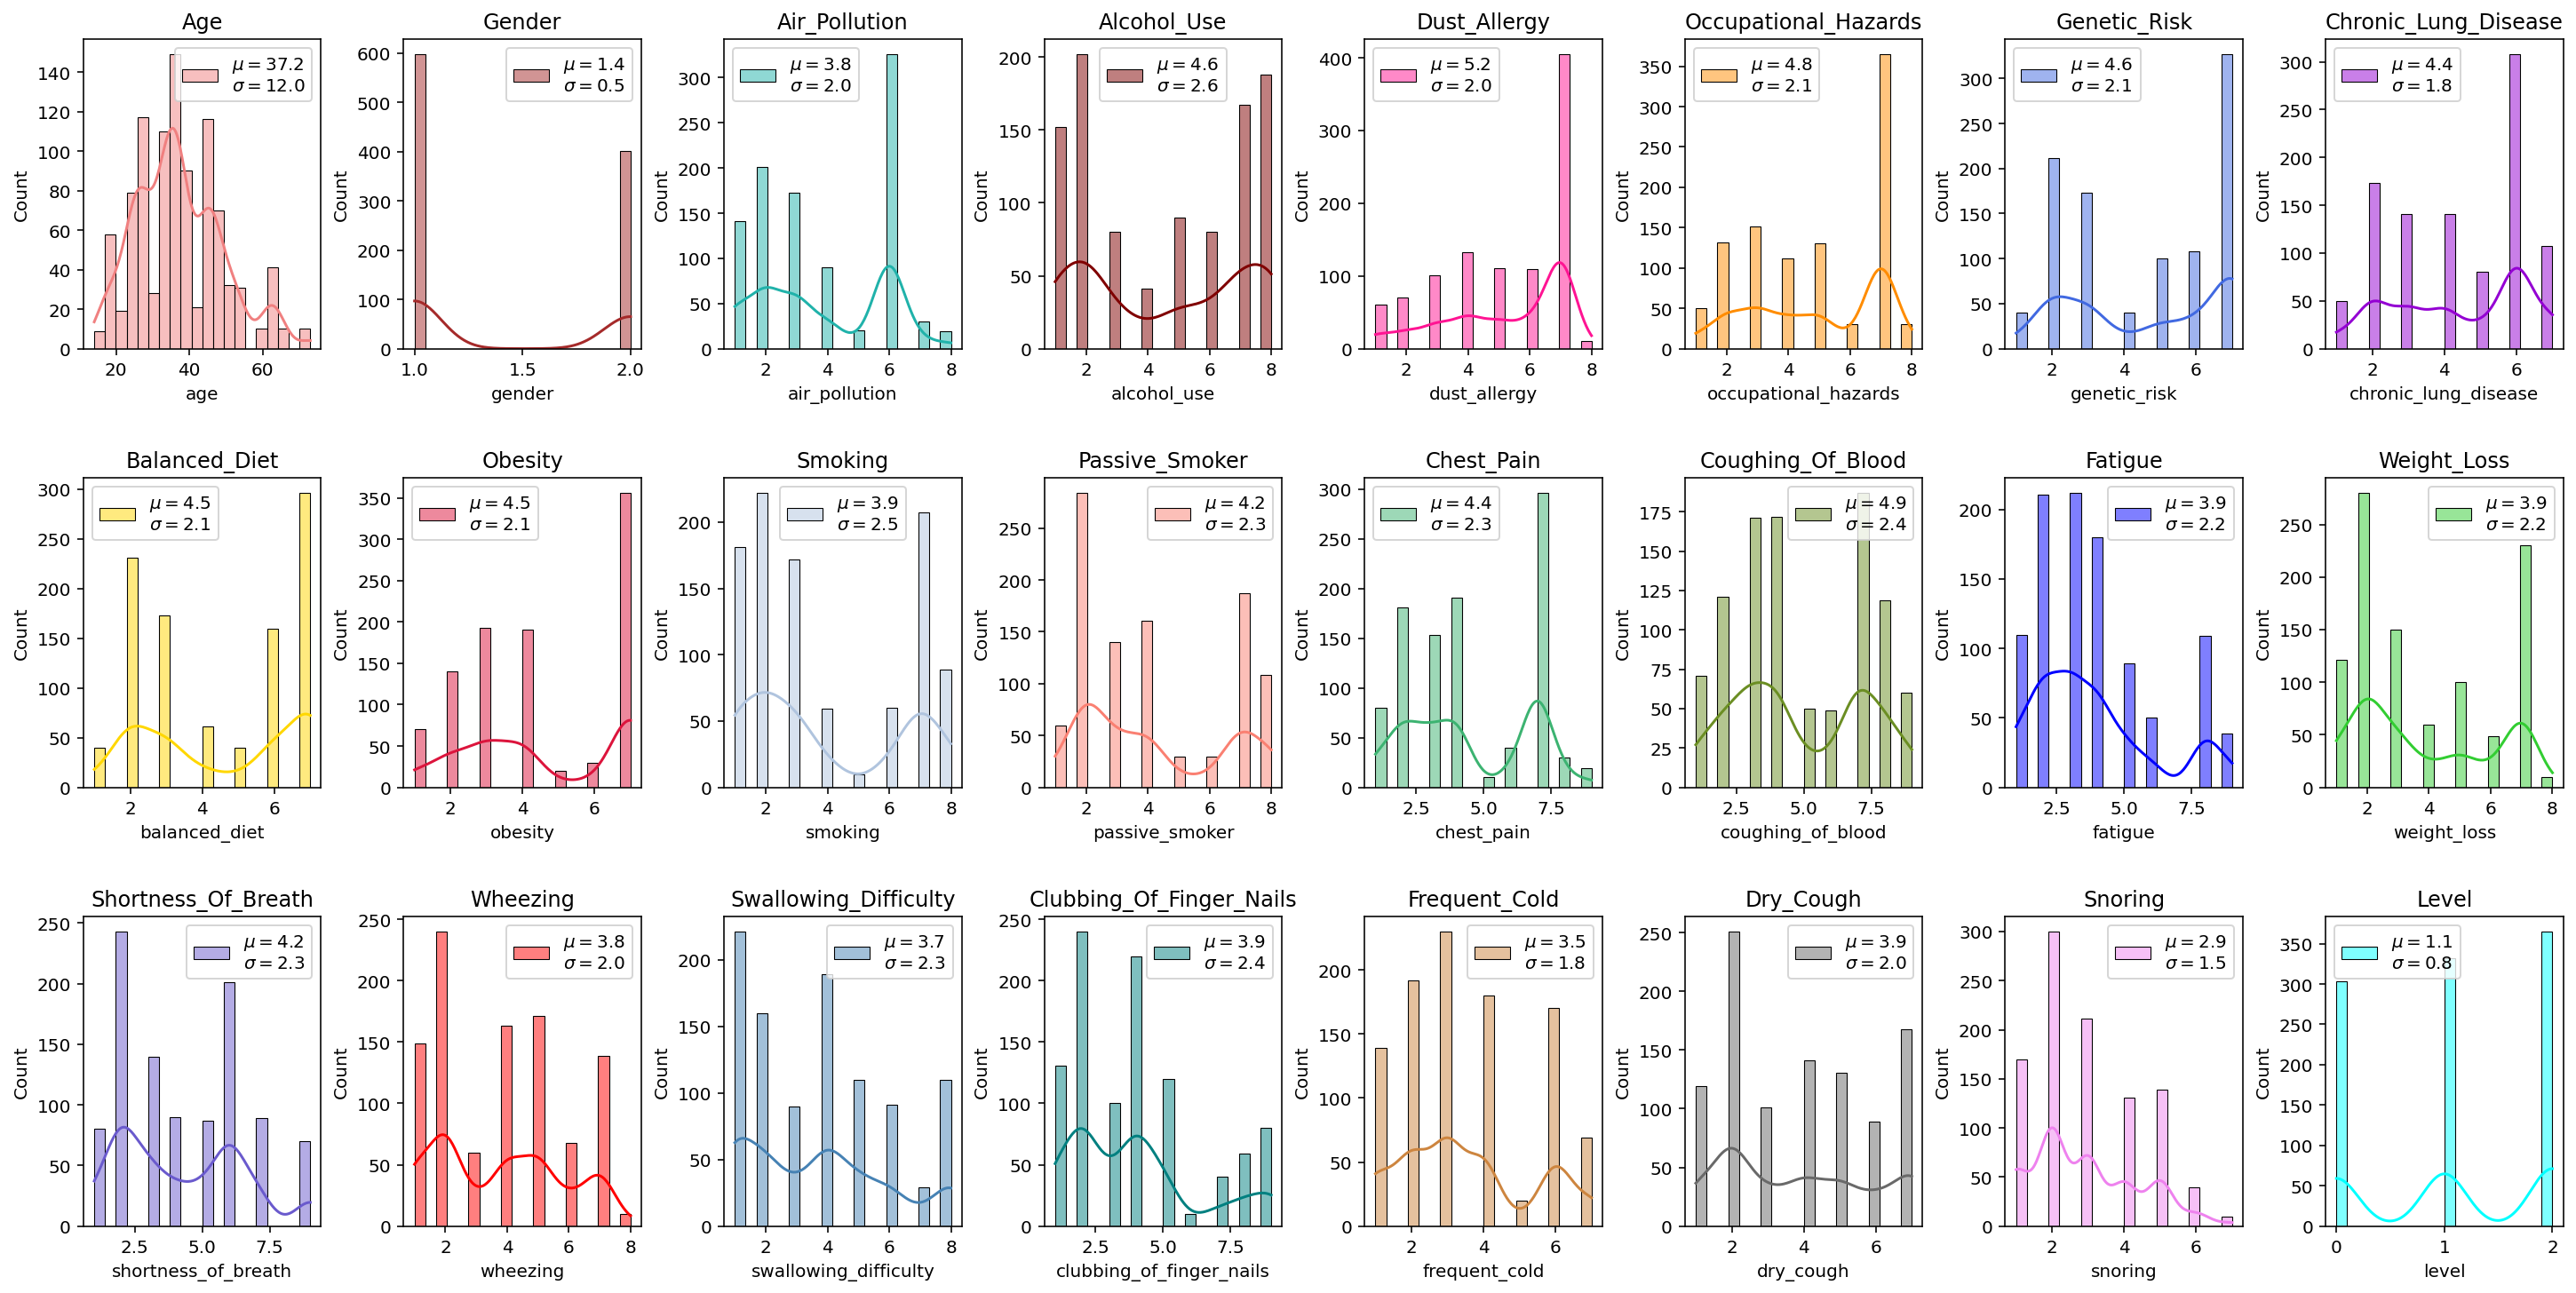

In [12]:
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()
i = 0

for k, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 kde=True,
                 bins=20,
                 color=colors[i],
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k.title()}')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

# <p style="font-size:0%;color:white;"><b> 4 - Model Building </b></p>

***
<a name='MB'>

<div style="color:white;display:width;border-radius:10px;
            background-color:#09E5E8;
            font-size:200%;
            font-family:computermodern;
            letter-spacing:0.75px">
    <p style="padding: 8px;color:black;"><b> 4 | Model Building </b></p>
</div>
    
<a name='TT'>


# <b> 4.1 <span style='color:#07CBCD'>|</span> Training Testing Splitting </b>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
2    248
1    233
0    219
Name: level, dtype: int64


<a name='MR'>

# <b> 4.2 <span style='color:#07CBCD'>|</span> Multinomial Logistic Regression </b>

**Overview:**
Multinomial Logistic Regression is a classification algorithm that extends logistic regression to handle multiple classes. It models the probability of each class and predicts the class with the highest probability.

**Algorithm:**
1. **Log-Odds Calculation:** Multinomial logistic regression calculates log-odds for each class relative to a reference class.
2. **Softmax Function:** It then applies the softmax function to convert log-odds into probabilities, ensuring they sum to 1 across all classes.
3. **Prediction:** The class with the highest probability is predicted as the final output.

**Parameters:**
- **penalty:** Regularization term. 'l2' is commonly used to prevent overfitting.
- **C:** Inverse of regularization strength. Smaller values indicate stronger regularization.
- **fit_intercept:** Whether to calculate the intercept for this model.
- **solver:** Optimization algorithm. 'lbfgs' is suitable for multiclass problems.
- **multi_class:** Method to handle multiple classes. 'auto' chooses 'ovr' for binary, and 'multinomial' for more than two classes.

In [14]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)

# fitting model
MR.fit(X_train, y_train)

# predicting with model
MR_pred = MR.predict(X_test)

# Printing model coefficents
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 36.71829902  -0.45603695 -36.26226207]
Coefficients: 
 [[-0.03680778  0.07863039 -0.14375986 -0.41356202 -0.28484842  0.03222765
  -0.46924271 -0.21870648 -0.03309957 -1.01592729 -0.02799999 -0.91216266
   0.28613539 -0.83421061 -0.74974568  0.03597259 -0.23742315 -0.90164997
  -0.80137415 -0.77615246 -0.64117435 -0.52198461 -0.69802999]
 [ 0.04254346 -0.14186763 -0.32682546 -0.19294389  0.41674334 -0.02788335
   0.22961985 -0.13948905 -0.30278733  0.52077104 -0.0885175   0.10989017
  -0.35233631 -0.00558215 -0.09409822 -0.41787193 -0.24251123  0.72510162
  -0.04125137  0.33988965  0.21093618  0.13033143  0.41279928]
 [-0.00573569  0.06323724  0.47058532  0.60650591 -0.13189492 -0.00434429
   0.23962286  0.35819553  0.3358869   0.49515626  0.11651748  0.80227248
   0.06620092  0.83979276  0.8438439   0.38189934  0.47993437  0.17654835
   0.84262552  0.43626281  0.43023818  0.39165318  0.28523071]]


In [15]:
def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.Blues):
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

### <b> 4.2.1 <span style='color:#07CBCD'>|</span> Confusion Matrix of Multinomial Model </b>

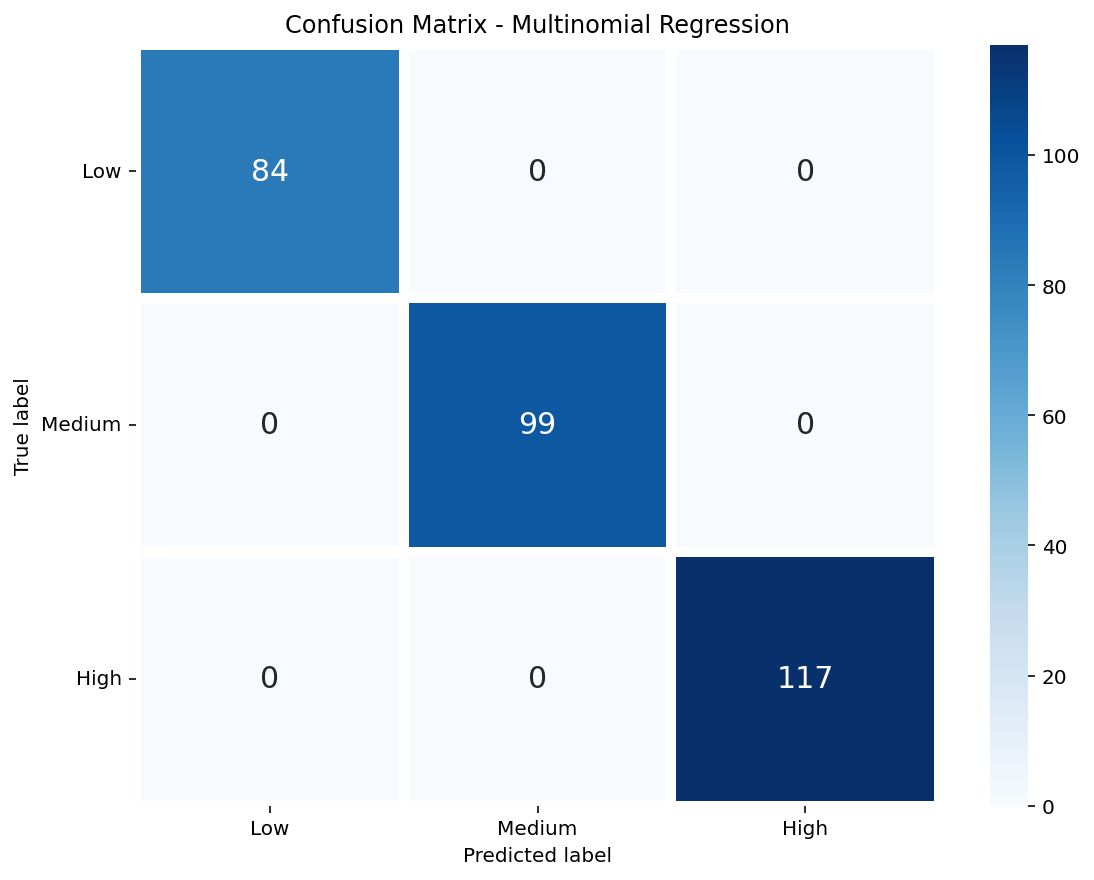

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [16]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')

# Model report
ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))

<a name='RF'>

# <b> 4.3 <span style='color:#07CBCD'>|</span> Random Forest Classifier </b>

**Overview:**
Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks. It enhances the accuracy and robustness of predictions by combining the results from multiple trees.

**Algorithm:**
1. **Bootstrap Sampling:** Random Forest builds multiple decision trees by sampling, with replacement, from the training dataset (bootstrap sampling).
2. **Feature Randomization:** At each node of the tree, a random subset of features is considered for splitting, adding diversity to the trees.
3. **Voting Mechanism:** For classification, the mode (most frequent class) among the trees is the final predicted class.

**Parameters:**
- **n_estimators:** Number of trees in the forest. Higher values generally lead to better performance.
- **criterion:** The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.
- **max_depth:** Maximum depth of the individual trees. Controls the complexity of each tree.
- **min_samples_split:** Minimum number of samples required to split an internal node.
- **min_samples_leaf:** Minimum number of samples required to be at a leaf node.

In [17]:
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):
    
    scores = []
    
    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=40)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    plt.plot(n_list, scores)
    plt.xlabel('Value of n_estimators for Random Forest Classifier')
    plt.ylabel('Testing Accuracy')
    plt.grid(alpha=0.1)
    plt.show()
        

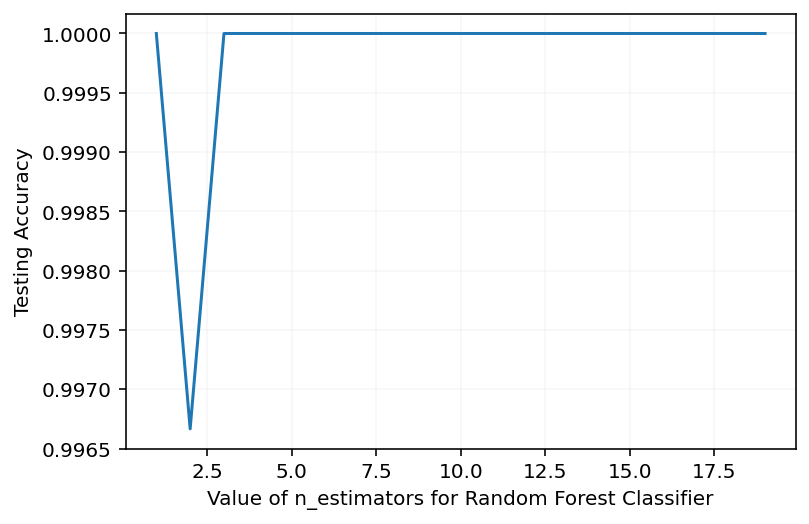

In [18]:
# n Accuracy analysis
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

In [19]:
# Define model and set random_state
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# fitting model
RF.fit(X_train, y_train)

# predicting with model
RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

2    117
1     99
0     84
dtype: int64

### <b> 4.3.1 <span style='color:#07CBCD'>|</span> Random Forest Classifier Plot </b>

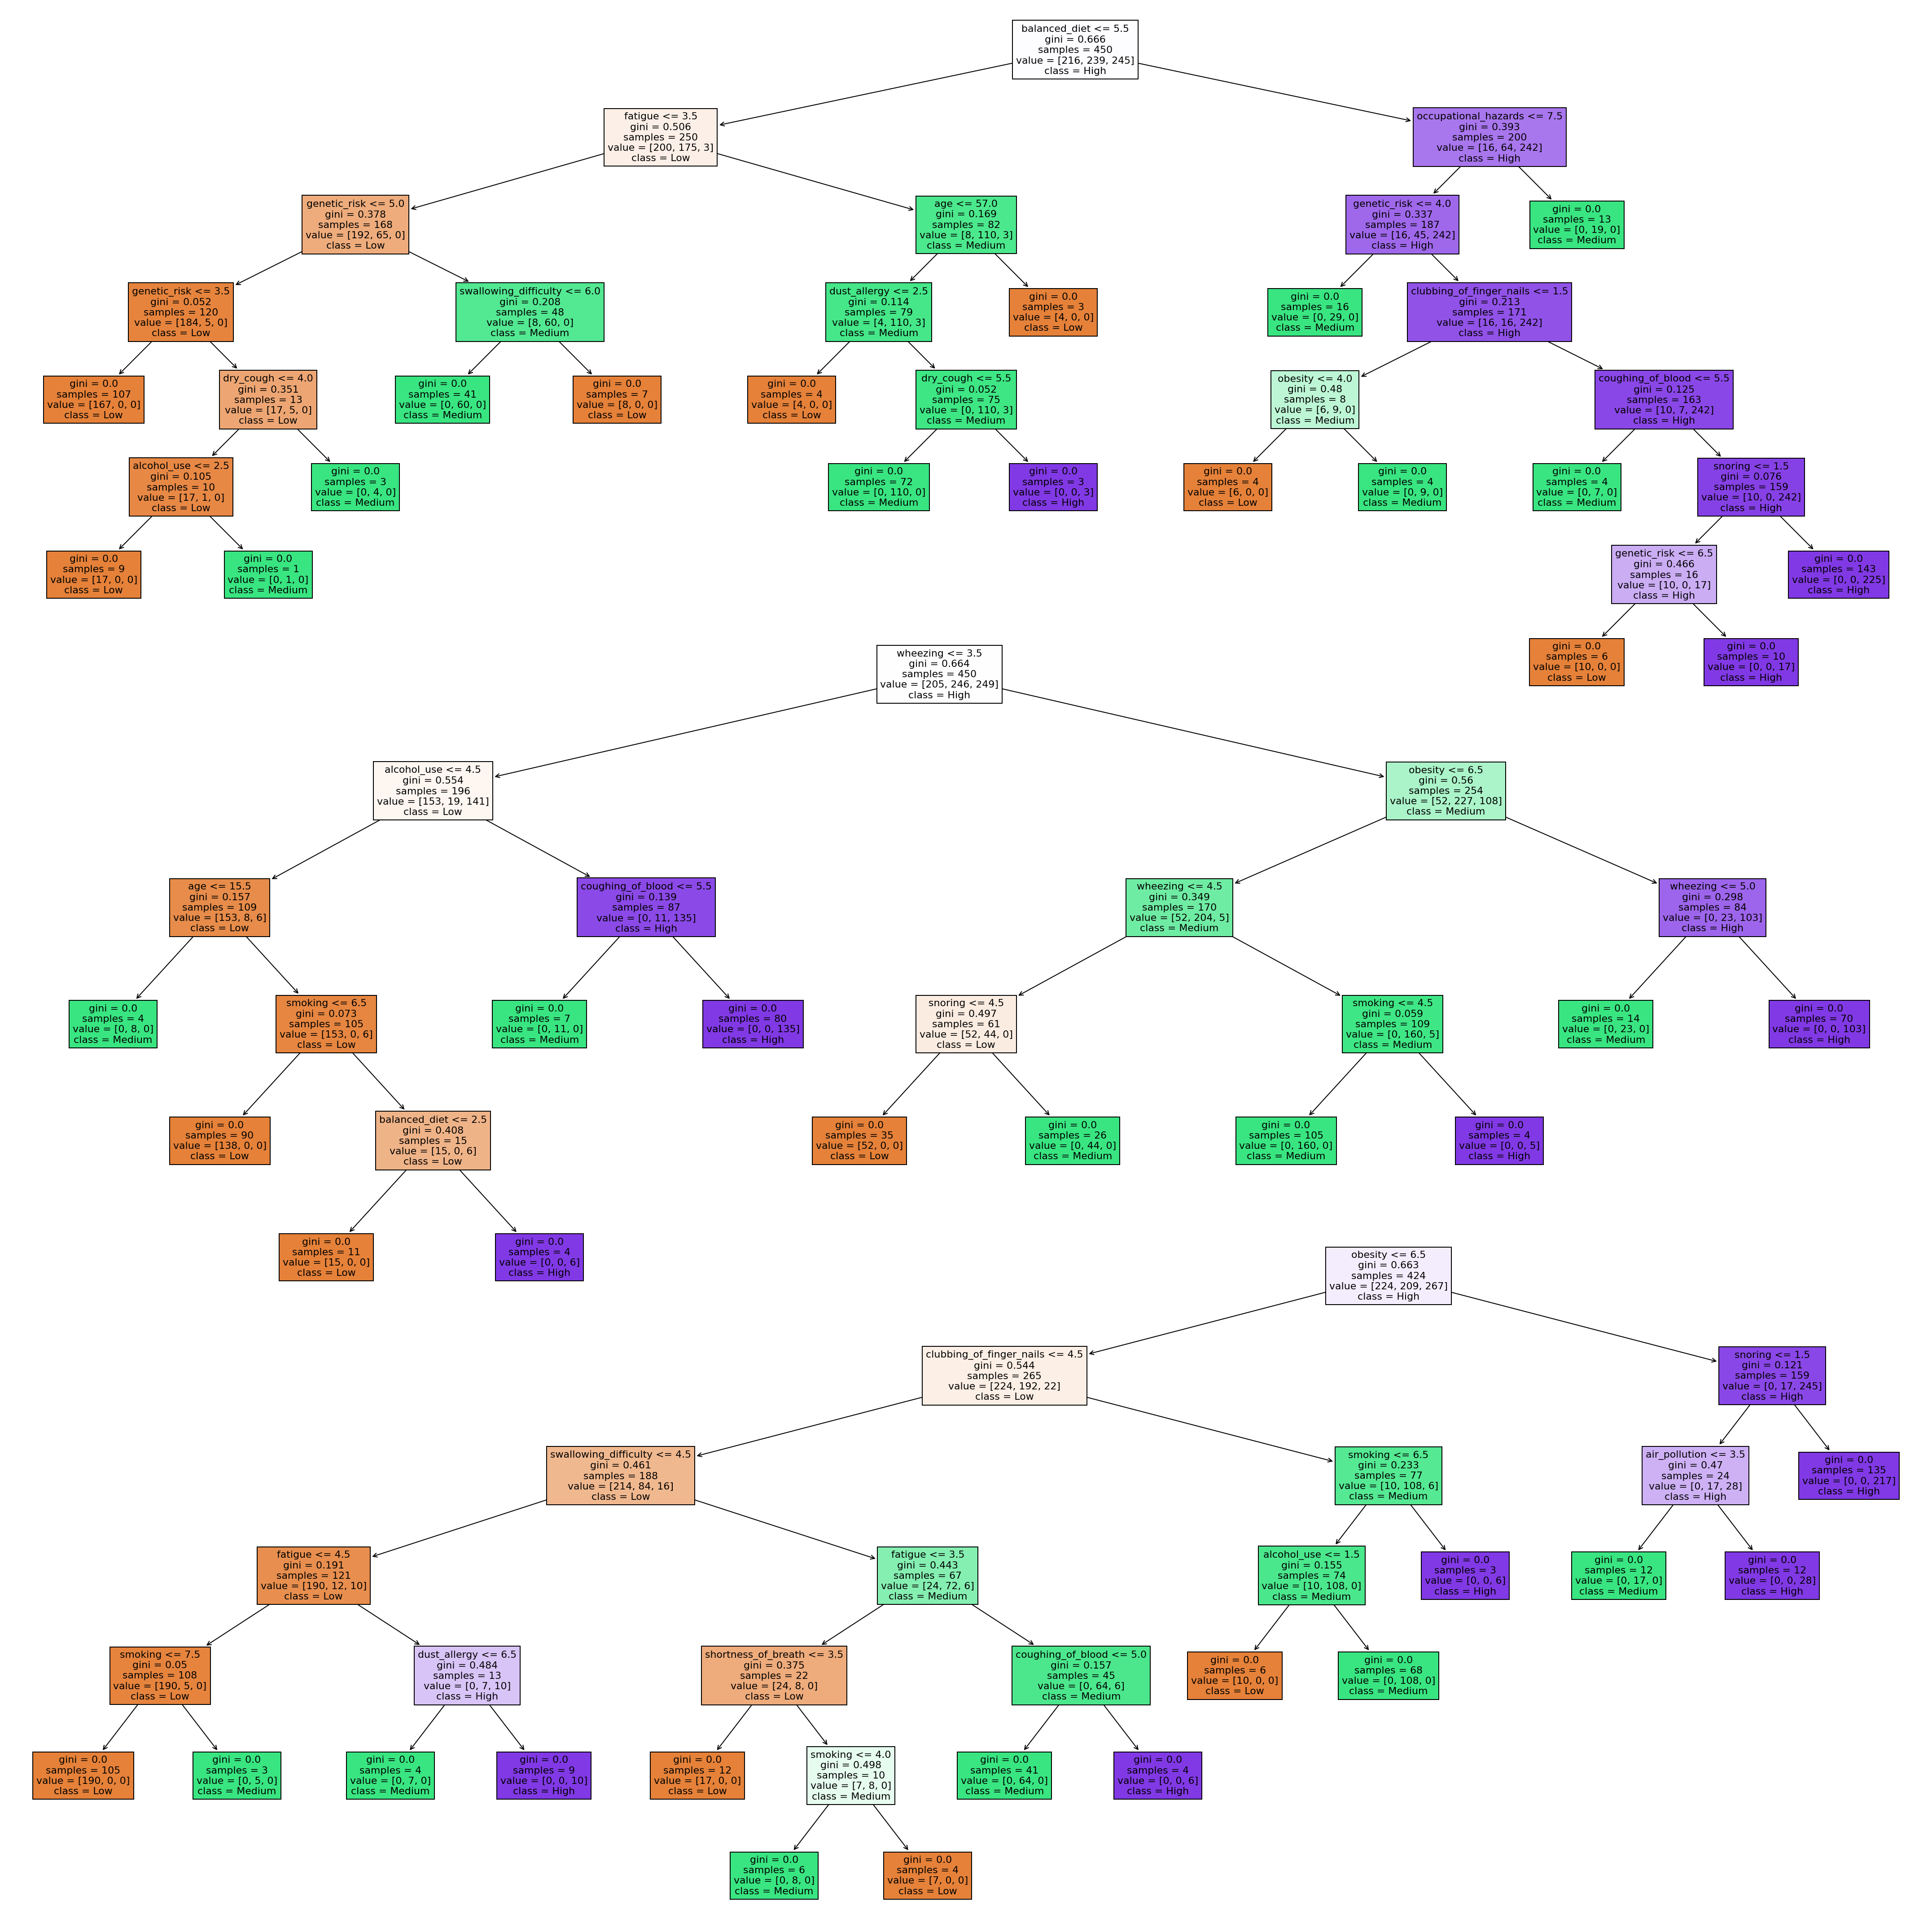

In [20]:
from sklearn import tree

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)
    
plt.tight_layout(h_pad=-10)
plt.show()

### <b> 4.3.2 <span style='color:#07CBCD'>|</span> Confusion Matrix of Random Forest Classifier </b>

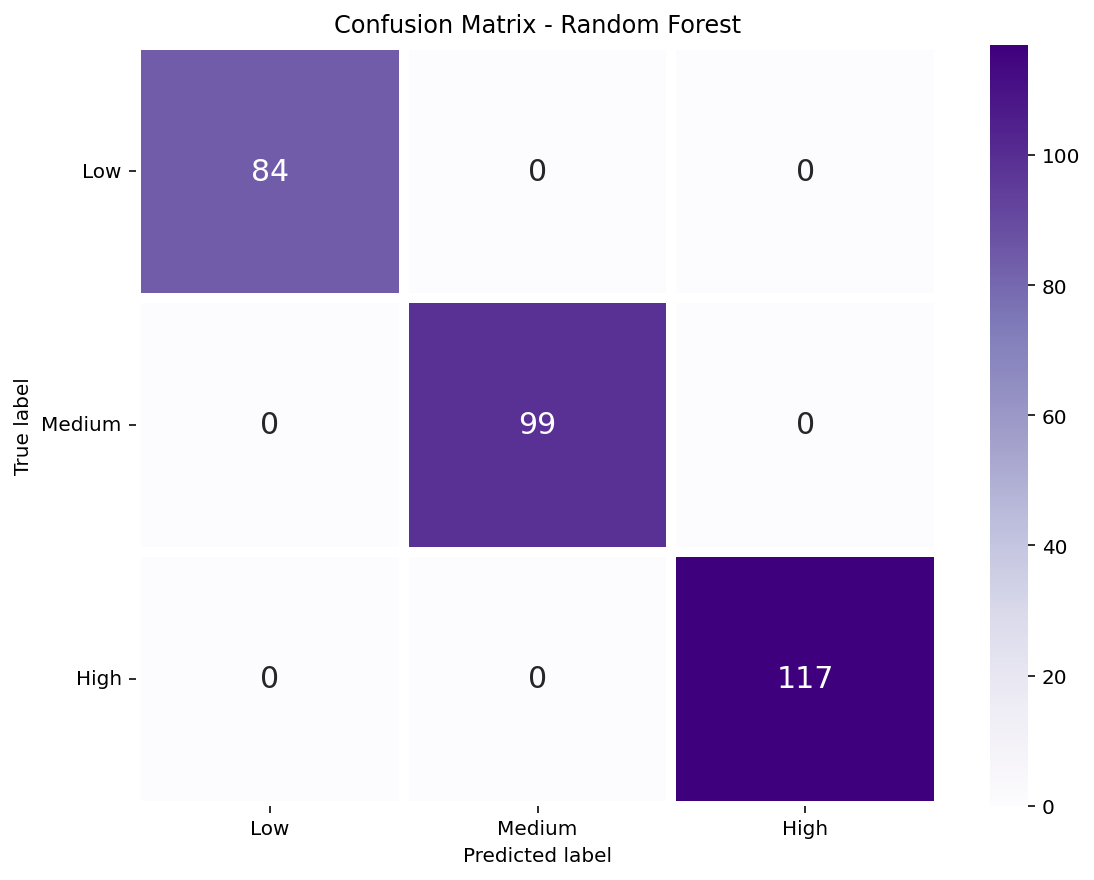

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [21]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Purples')

# Classification report for test data and predictions
ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

<a name='NB'>
    
# <b> 4.4 <span style='color:#07CBCD'>|</span> Gaussian Naive Bayes (GaussianNB) </b>
    
**Overview:**
Gaussian Naive Bayes (GaussianNB) is a probabilistic classification algorithm based on Bayes' theorem. It assumes that features are conditionally independent within each class and that the distribution of each feature is Gaussian (normal).

**Bayes' Theorem:**
$$ P(y | X) = \frac{P(X | y) \cdot P(y)}{P(X)} $$
- $ P(y | X) $: Posterior probability of class $ y $ given features $ X $
- $ P(X | y) $: Likelihood of features $ X $ given class $ y $
- $ P(y) $: Prior probability of class $ y $
- $ P(X) $: Probability of features $ X $

**Algorithm:**
1. **Class Prior $P(y)$:** The parameter `priors` allows setting prior probabilities. If not specified, priors are adjusted according to the data.
2. **Smoothing ($var\_smoothing$):** A small portion of the largest variance is added to variances for stability during calculations.
3. **Variance ($(var$):** Represents the variance of each feature per class. Larger variances give less weight to that feature.
4. **Mean ($theta$):** Represents the mean of each feature per class. Used in the Gaussian distribution function.

**Parameters:**
- **priors:** Prior probabilities of the classes. If specified, priors are not adjusted according to the data.
- **var\_smoothing:** Portion of the largest variance of all features added to variances for stability during calculations.


In [22]:
# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions using Naive Bayes
nb_pred = nb_model.predict(X_test)

### <b> 4.4.2 <span style='color:#07CBCD'>|</span> Confusion Matrix of Naive Bayes </b>

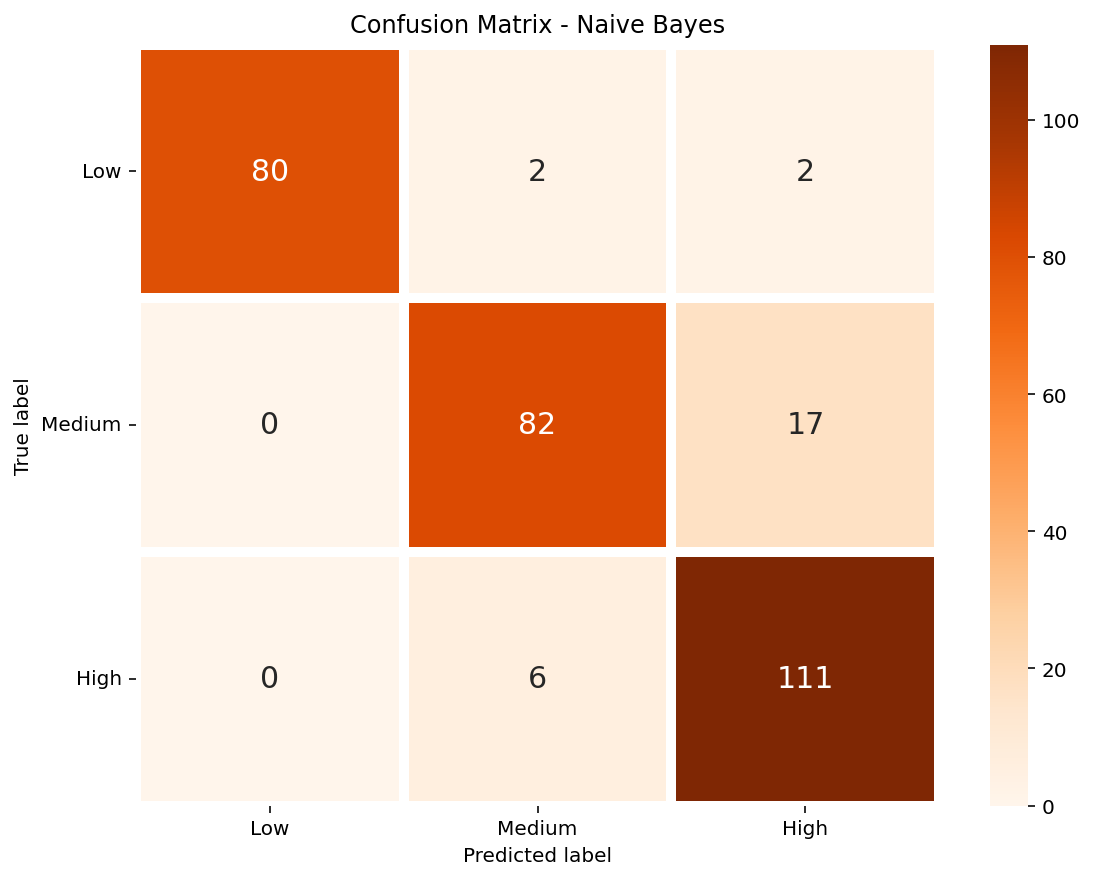

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [23]:
CM(y_test, nb_pred, col_names=['Low', 'Medium', 'High'], title='- Naive Bayes', cmap='Oranges')

# View the classification report for test data and predictions
ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred))

<a name='KNN'>

# <b> 4.5 <span style='color:#07CBCD'>|</span> K-Nearest Neighbors (KNN) </b>

**Overview:**
K-Nearest Neighbors (KNN) is a versatile classification algorithm based on the principle of similarity. It classifies a data point by considering the majority class among its K nearest neighbors in the feature space.

**Algorithm:**
1. **Distance Metric:** KNN uses a distance metric (typically Euclidean distance) to measure the similarity between data points.
2. **Nearest Neighbors:** It identifies the K data points in the training set that are closest to the input data point.
3. **Majority Vote:** The class label for the input point is determined by the majority class among its K nearest neighbors.

**Parameters:**
- **n_neighbors:** Number of neighbors to consider. It influences the granularity of the decision boundary.
- **weights:** Determines the weight of each neighbor. 'uniform' treats all neighbors equally, while 'distance' gives more weight to closer neighbors.
- **algorithm:** Algorithm used to compute nearest neighbors. 'auto' selects the most efficient one based on the training data.
- **leaf_size:** Leaf size passed to BallTree or KDTree. It can affect the speed of the construction and query, as well as the memory required.
- **p:** Power parameter for the Minkowski metric. When \( p = 1 \), it is equivalent to using the Manhattan distance. When \( p = 2 \), it is equivalent to using the Euclidean distance.
- **metric:** The distance metric used for the tree. 'minkowski' is a generalization of the Euclidean and Manhattan distances.
- **metric_params:** Additional keyword arguments for the metric function.
- **n_jobs:** Number of parallel jobs to run for neighbors search. Set to -1 to use all available processors.



In [24]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

# Predictions using Naive Bayes
knn_pred = knn_model.predict(X_test)

### <b> 4.5.2 <span style='color:#07CBCD'>|</span> Confusion Matrix of KNN </b>

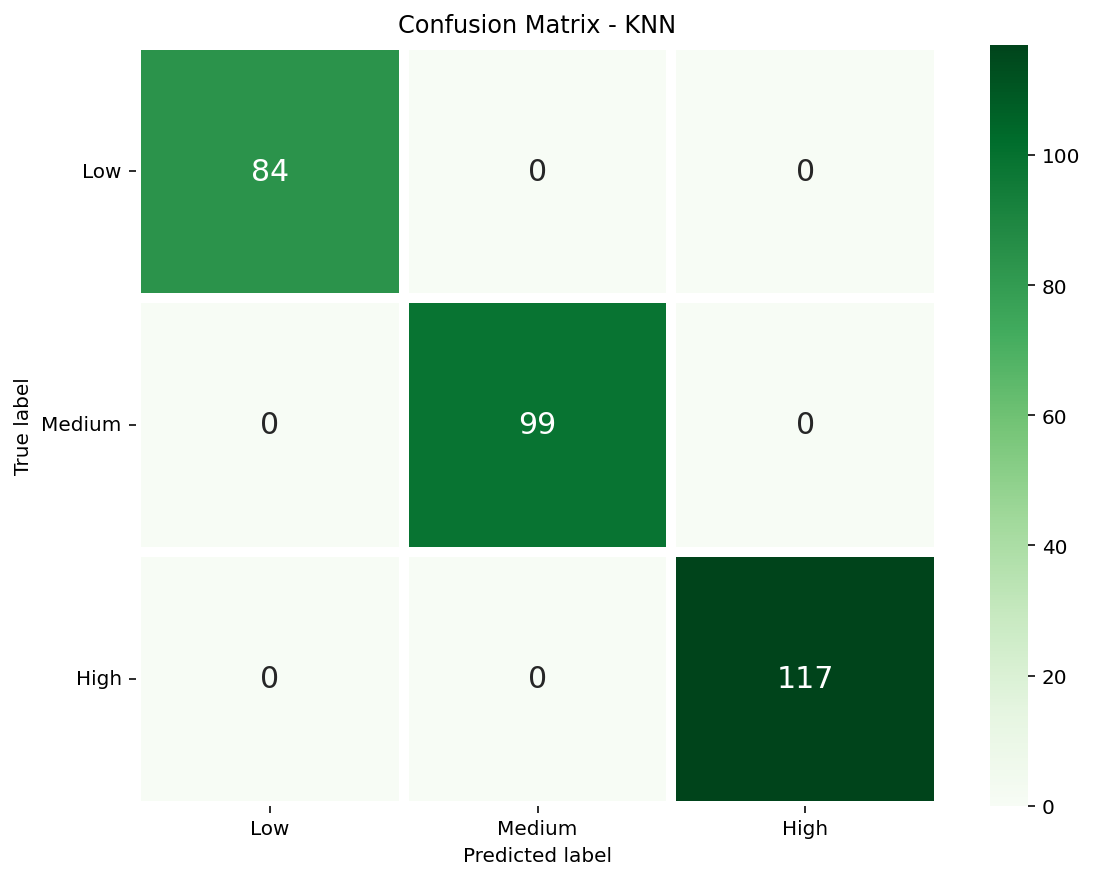

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [25]:
CM(y_test, knn_pred, col_names=['Low', 'Medium', 'High'], title='- KNN', cmap='Greens')

# View the classification report for test data and predictions
ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

<a name='SVM'>
    
# <b> 4.6 <span style='color:#07CBCD'>|</span> Support Vector Machines </b>

SVM finds the best line (or hyperplane) to separate different groups in your data. This line maximizes the space between groups. Key points:

- **Hyperplane Equation:** $ f(x) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b) $
- **Goal:** Minimize the complexity of the line while correctly classifying points.
- **Soft Margin SVM:** Allows for some errors when the data isn't perfectly separable.
- **Kernel Trick:** Handles complex patterns by transforming data into a higher-dimensional space.

Used in image recognition, text classification, and more for its effectiveness.


**`SVC` class in scikit-learn offers key parameters for fine-tuning the SVM algorithm**

- **C (Regularization Parameter):** Balances a smooth decision boundary (small values) vs. correct classification of training points (large values).
- **Kernel:** Specifies the kernel type. 'rbf' (Radial Basis Function) is common for non-linear relationships.
- **Gamma:** Influences the reach of a single training point's influence. 'scale' is often used, adapting to the dataset's characteristics.
- **Probability:** Enables probability estimates. Useful for obtaining probability predictions, but it may slow down the calculation.

These parameters significantly impact the model's behavior and can be adjusted to optimize performance for your specific dataset.

In [26]:
# Train Support Vector Machines
svm_model = SVC(C=0.5, kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions using Support Vector Machines
svm_pred = svm_model.predict(X_test)

### <b> 4.5.2 <span style='color:#07CBCD'>|</span> Confusion Matrix of Support Vector Machines </b>

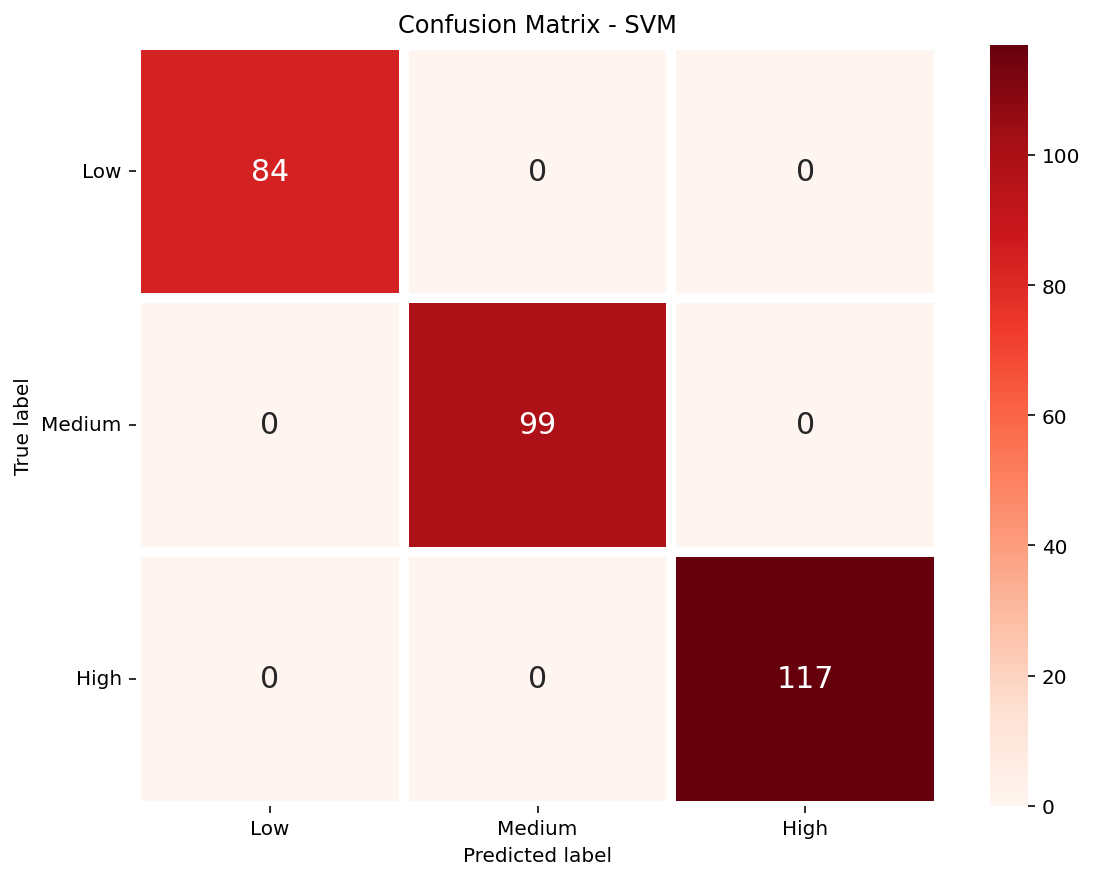

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [27]:
CM(y_test, svm_pred, col_names=['Low', 'Medium', 'High'], title='- SVM', cmap='Reds')

# View the classification report for test data and predictions
ml_accuracies['SVM'] = accuracy_score(y_test, svm_pred)
print(classification_report(y_test, svm_pred))

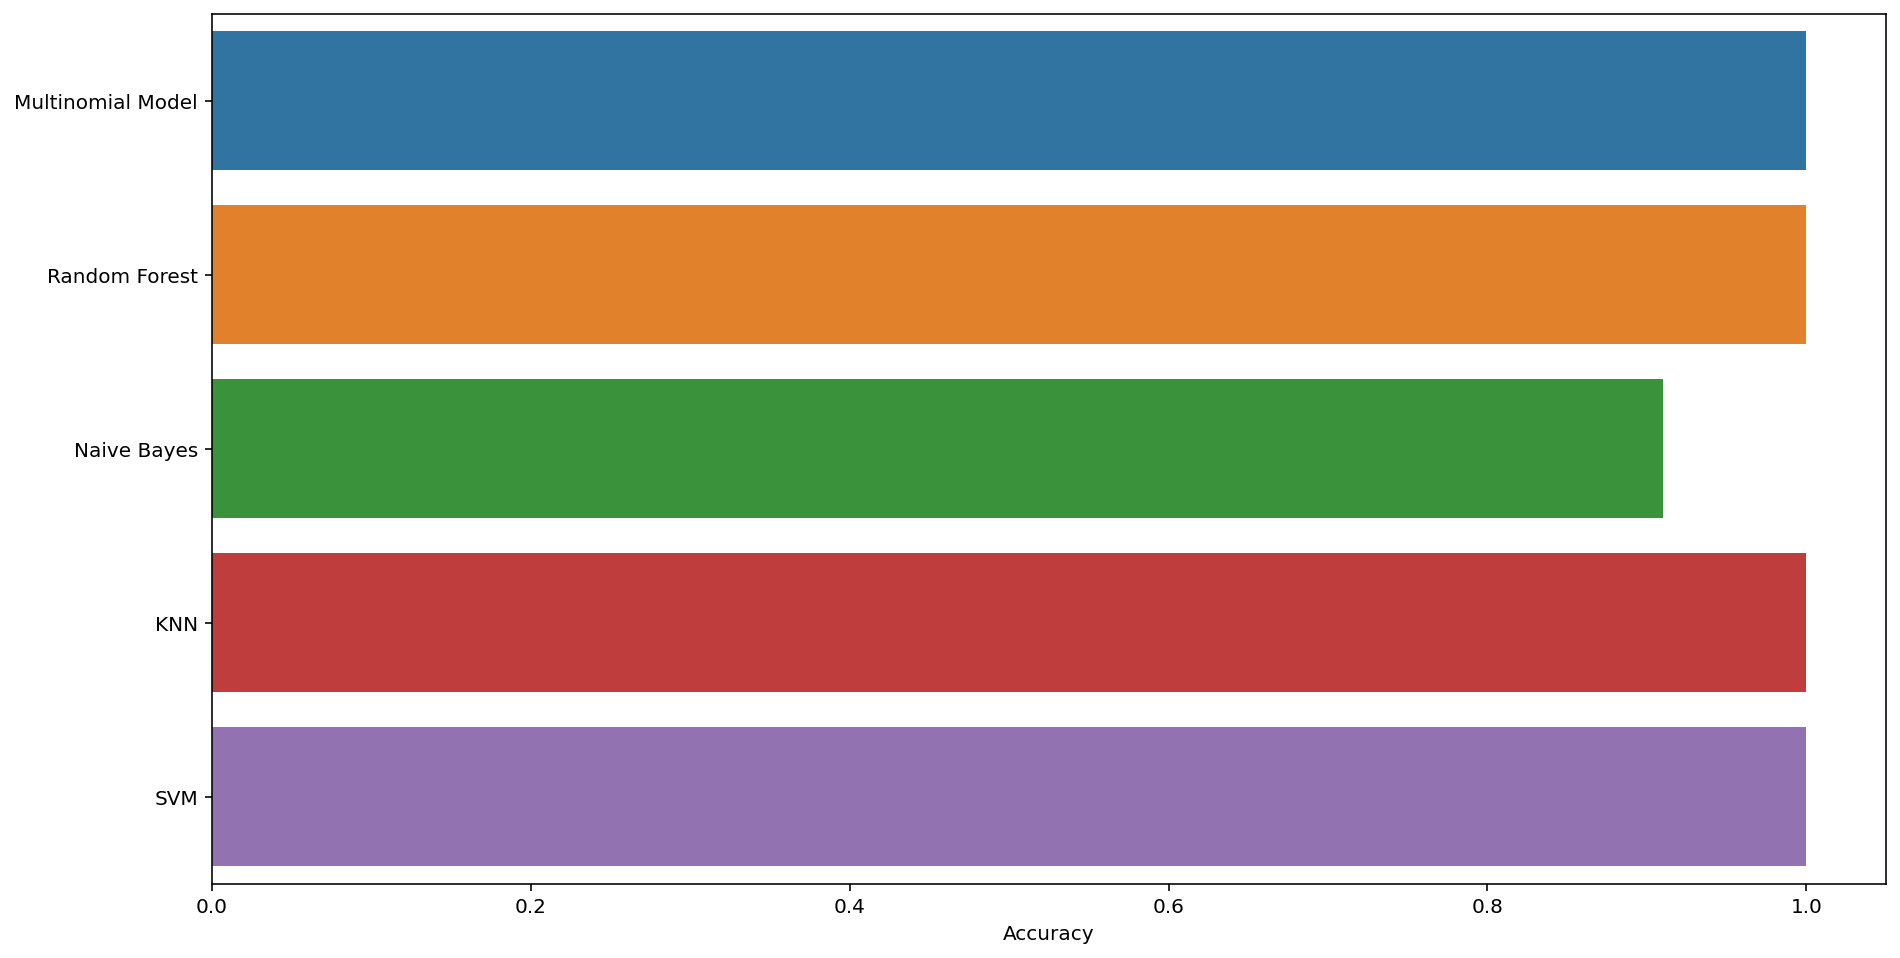

In [28]:
# More coming soon!
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(ml_accuracies.values()),
    y=list(ml_accuracies.keys()),
)
plt.xlabel('Accuracy')
plt.show()

***
<a name='B'>

### MORE COMING SOON! :)
    
#### Sections:
[`1. Data Meaning`](#DM)<br>
[`2. Initial Data Analysis`](#IIA)<br>
[`3. Data Visualization`](#DV)<br>
[`4. Model Building`](#MB)<br>
>[`4.1 Training Testing Split`](#TT)<br>
[`4.2 Multinomial Regression`](#MR)<br>
[`4.3 Random Forest`](#RF)<br>
[`4.4 Naive Bayes`](#NB)<br>
[`4.5 K-Nearest Neighbors`](#KNN)<br>
[`4.6 Support Vector Machine`](#SVM)<br>
    
[`5. Top`](#T)<br>
    
        
<p style="padding: 10px;
          background-color: yellow;
          font-family: computermodern;
          color: black;
          font-size: 210%;
          text-align: center;
          border-radius:20px 20px;
          ">Thank you and if you found this useful please like 👍🏼 </p>
    
***